In [10]:
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime

In [13]:
data = load_boston()

In [14]:
X = data.data

In [15]:
y = data.target

In [16]:
X.shape

(506, 13)

In [17]:
Xtrain, Xtest, Ytrain, Ytest = TTS(X,y,test_size=0.3,random_state=0)

In [7]:
reg = XGBR(n_estimators=100).fit(Xtrain, Ytrain)
reg.predict(Xtest)

array([23.514858 , 25.357508 , 23.967196 ,  8.312717 , 21.130411 ,
       21.105719 , 20.725838 , 19.562037 , 18.492672 , 18.792444 ,
        5.245555 , 14.614181 , 14.519265 ,  8.962308 , 49.295475 ,
       35.596317 , 20.7442   , 36.336857 , 27.304792 , 22.107613 ,
       23.722286 , 22.575104 , 20.196106 , 24.18872  , 20.026031 ,
       18.116072 , 17.950891 , 17.61209  , 46.694416 , 17.947472 ,
       17.039282 , 16.824755 , 19.347273 , 19.862356 , 26.527122 ,
       18.40976  ,  8.042849 , 26.1059   , 14.421125 , 15.414048 ,
       23.519497 , 21.43997  , 23.397078 , 14.55915  , 21.181278 ,
       22.45081  , 20.791506 , 17.89683  , 15.855738 , 23.79707  ,
       17.793732 , 20.995626 , 20.236633 , 37.784916 , 15.410646 ,
       19.505308 , 17.211187 , 17.786005 , 17.191828 , 20.571682 ,
       21.583426 , 20.924376 , 31.629545 , 28.701424 , 19.519058 ,
       27.415407 , 17.743    , 18.192339 , 13.872983 , 24.24774  ,
       20.135036 , 22.032103 , 23.491331 , 32.40808  , 24.9377

In [8]:
reg.score(Xtest,Ytest)

0.7876616442512873

In [9]:
MSE(Ytest, reg.predict(Xtest))

17.680459709835162

In [10]:
reg = XGBR(n_estimators=100)
CVS(reg, Xtrain, Ytrain, cv=5).mean()

0.8810174653672738

In [11]:
CVS(reg,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-9.934063463926446

In [12]:
# 查看sklearn中所有的模型评估指标
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [13]:
# 用随机森林进行对比
rfr = RFR(n_estimators=100)
CVS(rfr,Xtrain,Ytrain,cv=5).mean()

0.8456267665600329

In [14]:
CVS(rfr, Xtrain, Ytrain, scoring='neg_mean_squared_error').mean()

-13.042257400603617

In [15]:
# 使用逻辑回归对比
lr = LinearR()
CVS(lr,Xtrain, Ytrain,cv=5).mean()

0.7183293974315926

In [16]:
CVS(lr,Xtrain,Ytrain,scoring='neg_mean_squared_error',cv=5).mean()

-23.000986361909185

In [17]:
# 使用silent参数
reg = XGBR(n_estimators=10, silent=False)
CVS(reg, Xtrain, Ytrain, cv=5,scoring='neg_mean_squared_error').mean()

[14:56:35] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:56:35] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:56:35] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


-13.007567606289532

In [18]:
# 定义绘制以训练样本为横坐标的学习曲线的函数
def plot_learning_curve(estimator,title,X,y
                        ,ax=None
                        ,ylim=None
                        ,cv=None
                        ,n_jobs=None
                       ):
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np
    
    train_sizes, train_scores, test_scores = learning_curve(estimator,X,y
                                                            ,shuffle=True
                                                            ,cv=cv
                                                            ,n_jobs=n_jobs
                                                           )
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
    
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid()
    ax.plot(train_sizes,np.mean(train_scores, axis=1),'o-'
            ,color='r'
            ,label="Training score"
           )
    ax.plot(train_sizes, np.mean(test_scores, axis=1),'o-'
            ,color='g'
            ,label="Test score"
           )
    ax.legend(loc="best")
    return ax

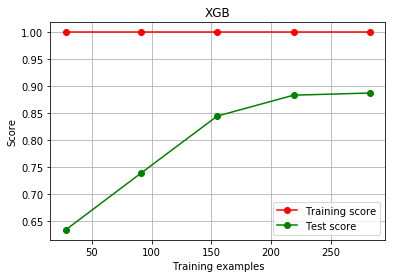

In [19]:
# XGB在波士顿数据集上的潜力
cv = KFold(n_splits=5, shuffle=True, random_state=0)
plot_learning_curve(XGBR(n_estimators=100,random_state=0)
                    ,"XGB"
                    ,Xtrain
                    ,Ytrain
                    ,ax=None
                    ,cv=cv
                   )
plt.show()

310 0.8888225393536876


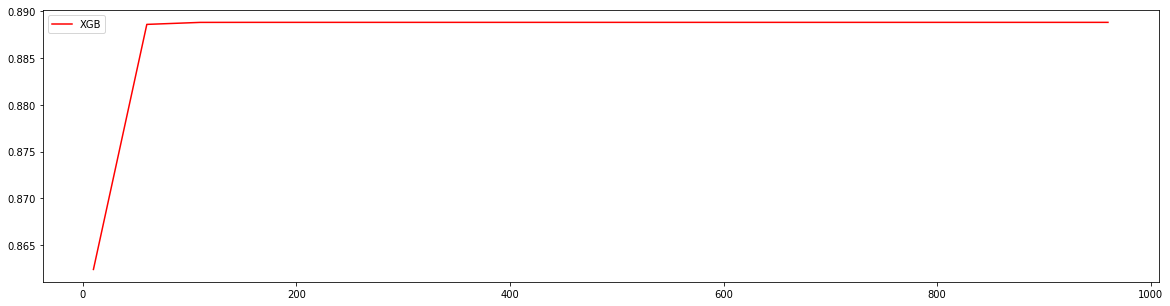

In [20]:
# 用参数学习曲线观察n_estimators对模型的影响
axisx = range(10,1010,50)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=i, random_state=0)
    rs.append(CVS(reg,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx, rs, c="red", label="XGB")
plt.legend()
plt.show()

100 0.8888228502299349 0.0012767824950069653
50 0.8888225373894059 0.0012767518444805658
100 0.8888228502299349 0.0012767824950069653 0.01363714112600245


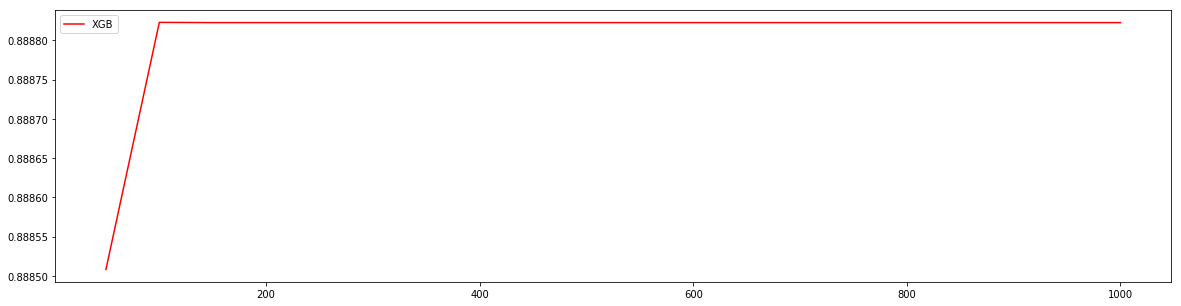

In [21]:
# 进化的学习曲线：方差与泛化误差
axisx = range(50,1050,50)
rs = []
var = []
ge = []

for i in axisx:
    reg = XGBR(n_estimators=i, random_state=0)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1-cvresult.mean())**2+cvresult.var())
    
print(axisx[rs.index(max(rs))], max(rs), var[rs.index(max(rs))])
print(axisx[var.index(max(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))], min(ge))
plt.figure(figsize=(20,5))
plt.plot(axisx, rs, c="red",label="XGB")
plt.legend()
plt.show()

100 0.8888228502299349 0.0012767824950069653
110 0.8888222374838761 0.0012767101940502636
100 0.8888228502299349 0.0012767824950069653 0.01363714112600245


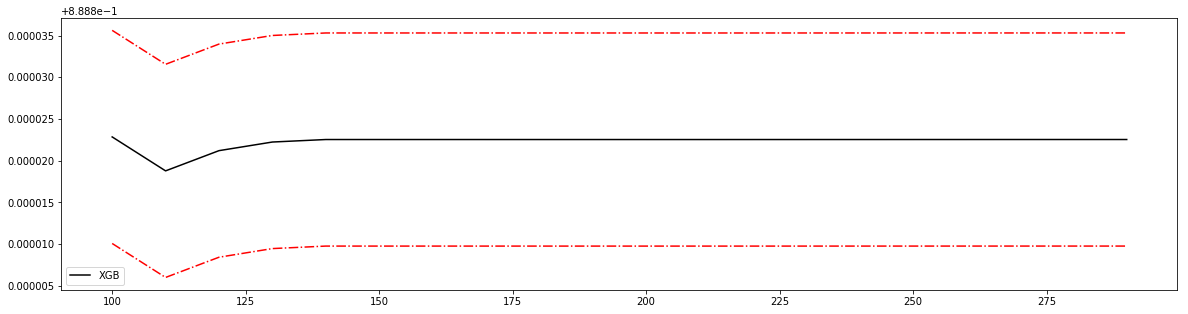

In [22]:
# 细化学习曲线，找出最佳n_estimators
axisx = range(100,300,10)
rs = []
var = []
ge = []

for i in axisx:
    reg = XGBR(n_estimators=i, random_state=0)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1-cvresult.mean())**2+cvresult.var())
    
print(axisx[rs.index(max(rs))], max(rs), var[rs.index(max(rs))])
print(axisx[var.index(max(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))], min(ge))

rs = np.array(rs)
var = np.array(var)*0.01

plt.figure(figsize=(20,5))
plt.plot(axisx, rs, c="black",label="XGB")
# 添加方差线
plt.plot(axisx, rs+var, c="red", linestyle="-.")
plt.plot(axisx, rs-var, c="red", linestyle="-.")
plt.legend()
plt.show()

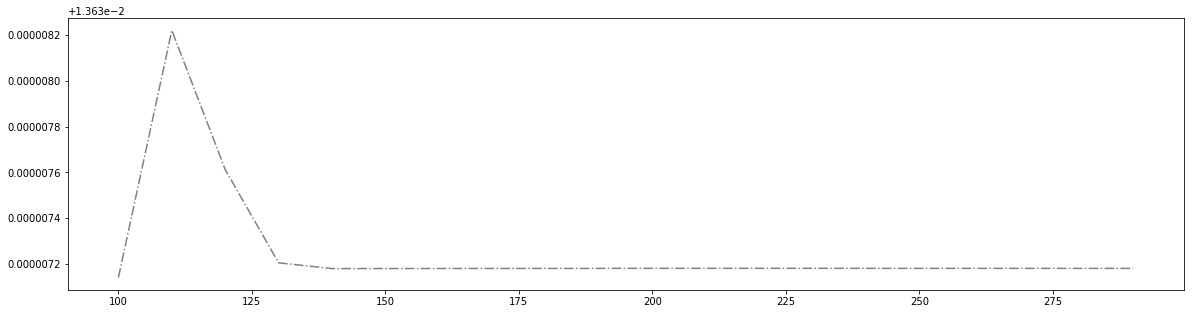

In [23]:
# 看泛化误差可控部分如何
plt.figure(figsize=(20,5))
plt.plot(axisx, ge, c='gray',linestyle='-.')
plt.show()

In [24]:
# 验证在取得最好n_estimators之后，效果是否提升了
time0 = time()
print(XGBR(n_estimators=100, random_state=0).fit(Xtrain, Ytrain).score(Xtest,Ytest))
print(time() - time0)

0.7876616442512873
0.08973026275634766


In [25]:
# 验证在取得最好n_estimators之后，效果是否提升了
time0 = time()
print(XGBR(n_estimators=660, random_state=0).fit(Xtrain, Ytrain).score(Xtest,Ytest))
print(time() - time0)

0.7876046801717855
0.18174958229064941


In [26]:
# 验证在取得最好n_estimators之后，效果是否提升了
time0 = time()
print(XGBR(n_estimators=180, random_state=0).fit(Xtrain, Ytrain).score(Xtest,Ytest))
print(time() - time0)

0.7876047047026616
0.1157224178314209


### 参数：随机抽样比例subsample

1.0 0.8888225364131015


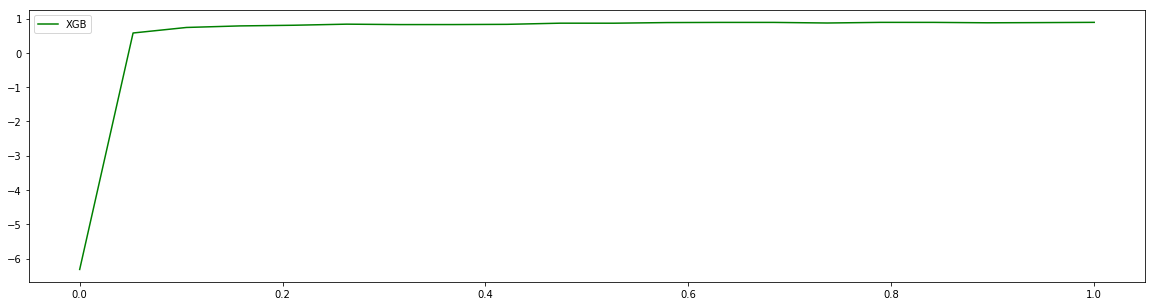

In [27]:
# 用参数学习曲线观察subsample对模型的影响
axisx = np.linspace(0,1,20)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=180, subsample=i, random_state=0)
    rs.append(CVS(reg,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx, rs, c="green", label="XGB")
plt.legend()
plt.show()

0.6 0.8961452201896793 0.0009235136670612121
0.05 0.8961452201896793 0.0009235136670612121
0.6 0.8961452201896793 0.0009235136670612121 0.0117093289565114


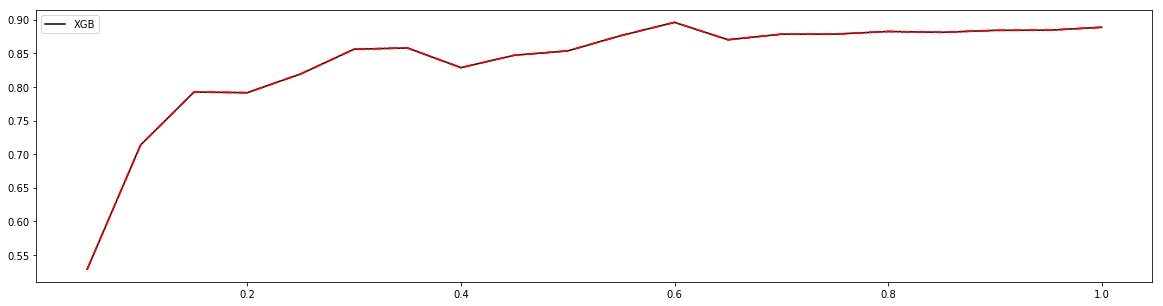

In [28]:
# 进化的学习曲线：方差与泛化误差
axisx = np.linspace(0.05,1,20)
rs = []
var = []
ge = []

for i in axisx:
    reg = XGBR(n_estimators=180, subsample=i, random_state=0)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1-cvresult.mean())**2+cvresult.var())
    
print(axisx[rs.index(max(rs))], max(rs), var[rs.index(max(rs))])
print(axisx[var.index(max(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))], min(ge))

rs = np.array(rs)
var = np.array(var)*0.01

plt.figure(figsize=(20,5))
plt.plot(axisx, rs, c="black",label="XGB")
# 添加方差线
plt.plot(axisx, rs+var, c="red", linestyle="-.")
plt.plot(axisx, rs-var, c="red", linestyle="-.")
plt.legend()
plt.show()

In [29]:
# 在最好subsample参数下，泛化误差情况
reg = XGBR(n_estimators=180
           ,subsample=0.8961452201896793
           ,random_state=0
          ).fit(Xtrain, Ytrain)
reg.score(Xtest,Ytest)

0.8197060919921875

In [30]:
MSE(Ytest, reg.predict(Xtest))

15.012262693760546

In [31]:
# 定义一个评分函数，这个评分函数能直接打印Xtrain上的交叉验证结果
def regassess(reg,Xtrain,Ytrain,cv,scoring=["r2"], show=True):
    score = []
    for i in range(len(scoring)):
        if show:
            print("{}:{:2f}".format(scoring[i]
                                    ,CVS(reg
                                         ,Xtrain
                                         ,Ytrain
                                         ,cv=cv
                                         ,scoring=scoring[i]
                                        ).mean()
                                   ))
        score.append(CVS(reg,Xtrain,Ytrain,cv=cv,scoring=scoring[i]).mean())
    
    return score

In [32]:
regassess(reg, Xtrain, Ytrain,cv,scoring=["r2","neg_mean_squared_error"])

r2:0.886155
neg_mean_squared_error:-9.277171


[0.8861545835082728, -9.277170744343229]

In [33]:
# 关闭上面函数的打印功能
regassess(reg,Xtrain,Ytrain,cv,scoring=["r2", "neg_mean_squared_error"],show=False)

[0.8861545835082728, -9.277170744343229]

In [34]:
# eta是如何影响我们的模型
from time import time
import datetime

for i in [0,0.2,0.5,1]:
    time0 = time()
    reg = XGBR(n_estimators=180, random_state=420,learning_rate=i)
    print("learning_rate={}".format(i))
    regassess(reg,Xtrain,Ytrain,cv,scoring=["r2","neg_mean_squared_error"])
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
    print("\t")

learning_rate=0
r2:-6.313486
neg_mean_squared_error:-579.502310
00:01:719918
	
learning_rate=0.2
r2:0.885225
neg_mean_squared_error:-9.243959
00:02:161551
	
learning_rate=0.5
r2:0.864037
neg_mean_squared_error:-10.848879
00:01:320054
	
learning_rate=1
r2:0.765099
neg_mean_squared_error:-18.512219
00:01:189355
	


0.05 0.8939530471683094


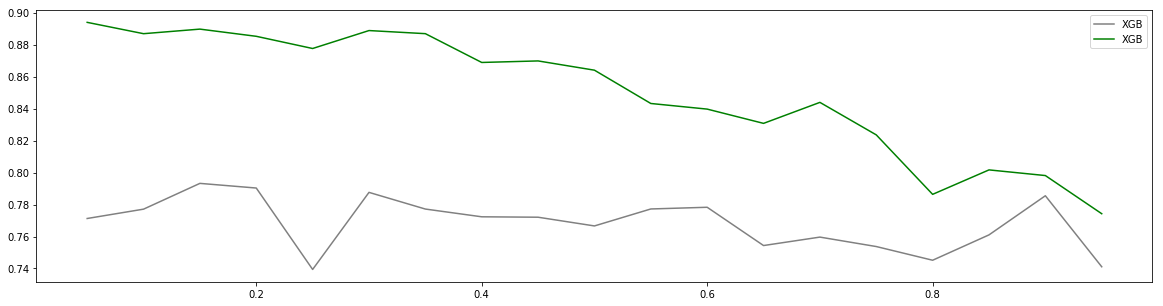

In [35]:
# 对学习率画学习曲线
axisx = np.arange(0.05,1,0.05)
rs = []
te = []
for i in axisx:
    reg = XGBR(n_estimators=180,random_state=420, learning_rate=i)
    score = regassess(reg,Xtrain,Ytrain,cv,scoring=["r2","neg_mean_squared_error"],show=False)
    test = reg.fit(Xtrain,Ytrain).score(Xtest,Ytest)
    rs.append(score[0])
    te.append(test)

print(axisx[rs.index(max(rs))], max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,te,c="gray",label="XGB")
plt.plot(axisx, rs,c="green",label="XGB")
plt.legend()
plt.show()

In [36]:
# 选择弱评估器
for booster in ["gbtree", "gblinear", "dart"]:
    reg = XGBR(n_estimators=180
               ,learning_rate=0.1
               ,random_state=420
               ,booster=booster
              ).fit(Xtrain,Ytrain)
    print(booster)
    print(reg.score(Xtest,Ytest))

gbtree
0.7771064711436227
gblinear
0.5930354292117993
dart
0.7771065030207849


### 使用XGBoost自身库

In [37]:
reg = XGBR(n_estimators=180, random_state=420).fit(Xtrain, Ytrain)
reg.score(Xtest, Ytest)

0.7876047047026616

In [38]:
MSE(Ytest, reg.predict(Xtest))

17.685200809914896

In [18]:
# xgb实现
import xgboost as xgb
dtrain = xgb.DMatrix(Xtrain, Ytrain)

In [19]:
dtest = xgb.DMatrix(Xtest, Ytest)

In [40]:
dtrain

In [43]:
# 写明参数
param = {"verbosity":0, 'objective':'reg:linear', "eta":0.1}
num_round = 180

In [44]:
# train可以导入训练数据，树的数量，其他的参数通过params导入
bst = xgb.train(param, dtrain, num_round)

In [47]:
from sklearn.metrics import r2_score
r2_score(Ytest, bst.predict(dtest))

0.7771064711436227

In [48]:
MSE(Ytest, bst.predict(dtest))

18.55934149359188

### gamma：让树停止生长

0.0 0.8888225364131015 0.0012767521728362353
0.0 0.8888225364131015 0.0012767521728362353 0.013637180582452378


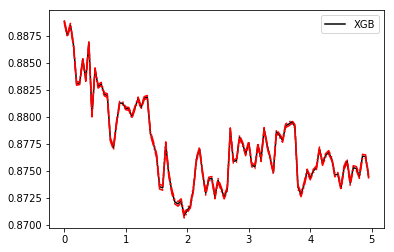

In [52]:
axisx = np.arange(0,5,0.05)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=180,random_state=420,gamma=i)
    result = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(result.mean())
    var.append(result.var())
    ge.append((1-result.mean())**2+result.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
# print(axisx[var.index(max(rs))],rs[var.index(min(var))],min(rs))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))

rs = np.array(rs)
var = np.array(var)*0.1
plt.figure()
plt.plot(axisx, rs, c="black",label="XGB")
plt.plot(axisx, rs+var, c="red", linestyle='-.')
plt.plot(axisx, rs-var, c="red", linestyle='-.')
plt.legend()
plt.show()

### 用xgboost.cv 调整参数

In [12]:
import xgboost as xgb

In [54]:
dfull = xgb.DMatrix(X, y)

In [56]:
param1 = {'obj':'reg:linear','gamma':0}
num_round = 180
n_fold = 5

In [58]:
time0 = time()
cv_result = xgb.cv(param1, dfull, num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

00:00:722280


In [59]:
cv_result

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,17.105578,0.129116,17.163214,0.584296
1,12.337972,0.097556,12.519736,0.473458
2,8.994071,0.065756,9.404534,0.472310
3,6.629481,0.050323,7.250335,0.500342
4,4.954406,0.033209,5.920812,0.591874
5,3.781454,0.029604,5.045190,0.687971
6,2.947768,0.038787,4.472030,0.686492
7,2.357748,0.042040,4.179314,0.737935
8,1.951907,0.044972,3.979878,0.798198
9,1.660895,0.044894,3.870751,0.812331


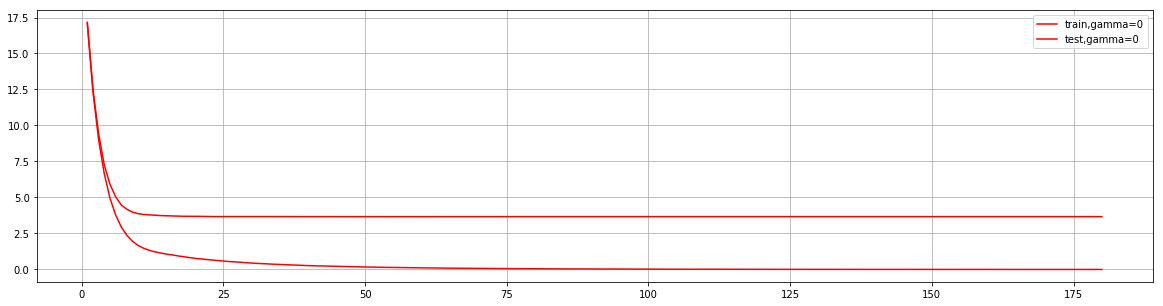

In [61]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,181), cv_result.iloc[:,0], c='red',label="train,gamma=0")
plt.plot(range(1,181),cv_result.iloc[:,2],c="red",label="test,gamma=0")
plt.legend()
plt.show()

#### 用cv调整gamma

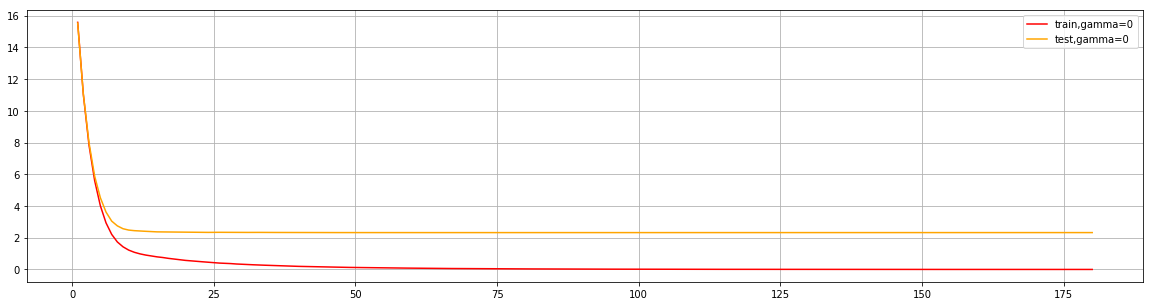

In [62]:
param1 = {'obj':'reg:linear','gamma':0,"eval_metric":"mae"}
num_round = 180
n_fold = 5
cv_result = xgb.cv(param1, dfull, num_round,n_fold)

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,181), cv_result.iloc[:,0], c='red',label="train,gamma=0")
plt.plot(range(1,181),cv_result.iloc[:,2],c="orange",label="test,gamma=0")
plt.legend()
plt.show()

00:00:535898
00:00:540841


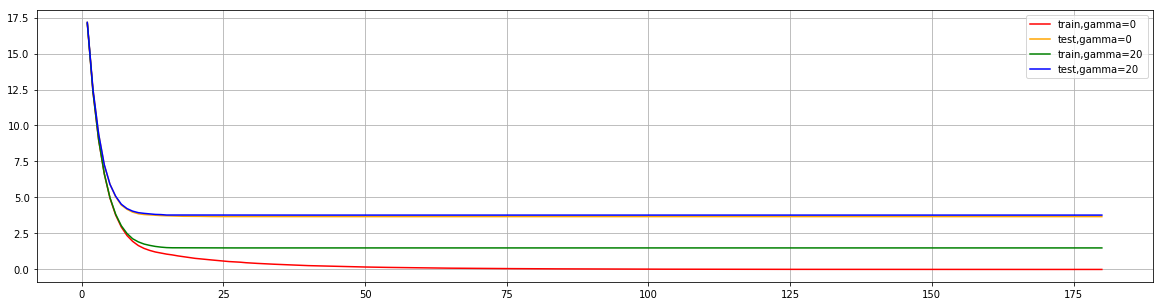

In [64]:
param1 = {'obj':'reg:linear','gamma':0}
param2 = {'obj':'reg:linear','gamma':20}
num_round = 180
n_fold = 5
time0 = time()
cv_result1 = xgb.cv(param1, dfull, num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

time0 = time()
cv_result2 = xgb.cv(param2, dfull, num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,181), cv_result1.iloc[:,0], c='red',label="train,gamma=0")
plt.plot(range(1,181),cv_result1.iloc[:,2],c="orange",label="test,gamma=0")
plt.plot(range(1,181), cv_result2.iloc[:,0], c='green',label="train,gamma=20")
plt.plot(range(1,181),cv_result2.iloc[:,2],c="blue",label="test,gamma=20")
plt.legend()
plt.show()

In [65]:
# 分类的例子
from sklearn.datasets import load_breast_cancer
data2 = load_breast_cancer()

In [66]:
x2 = data2.data
y2 = data2.target

In [67]:
dfull2 = xgb.DMatrix(x2,y2)

00:00:474141
00:00:840832


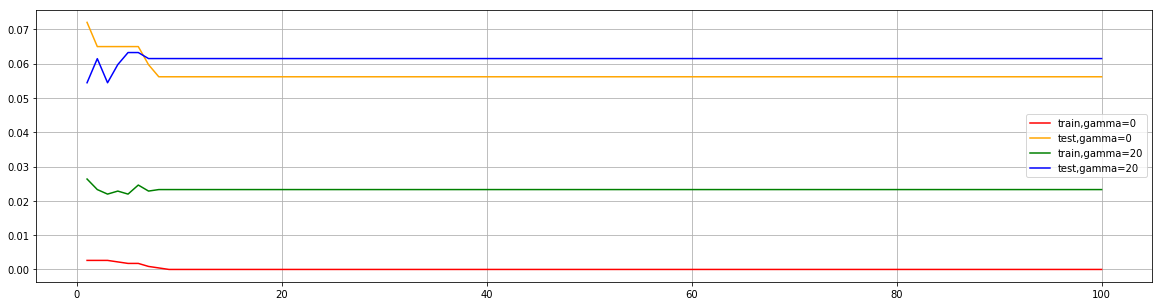

In [69]:
param1 = {'obj':'binary:logistic','gamma':0, 'n_fold':5}
param2 = {'obj':'binary:logistic','gamma':2, 'n_fold':5}
num_round = 100
time0 = time()
cv_result1 = xgb.cv(param1, dfull2, num_round,n_fold,metrics=("error"))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

time0 = time()
cv_result2 = xgb.cv(param2, dfull2, num_round,n_fold,metrics=("error"))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,101), cv_result1.iloc[:,0], c='red',label="train,gamma=0")
plt.plot(range(1,101),cv_result1.iloc[:,2],c="orange",label="test,gamma=0")
plt.plot(range(1,101), cv_result2.iloc[:,0], c='green',label="train,gamma=20")
plt.plot(range(1,101),cv_result2.iloc[:,2],c="blue",label="test,gamma=20")
plt.legend()
plt.show()

### 使用pickle保存和调用模型

In [70]:
import pickle

In [71]:
dtrain = xgb.DMatrix(Xtrain, Ytrain)

In [21]:
param = {
    'obj':'reg:linear'
    ,'subsample':1
    ,'eta':0.05
    ,'gamma':20
    ,'lambda':3.5
    ,'alpha':0.2
    ,'max_depth':4
    ,'colsample_bytree':0.4
    ,'colsample_bylevel':0.6
    ,'colsample_bynode':1
}
num_round = 180

In [73]:
bst = xgb.train(param, dtrain, num_round)

In [74]:
pickle.dump(bst,open("xgboost_bonston.dat","wb"))

In [2]:
import sys
sys.path

['',
 '/root/caicai',
 '/root/anaconda3/lib/python37.zip',
 '/root/anaconda3/lib/python3.7',
 '/root/anaconda3/lib/python3.7/lib-dynload',
 '/root/anaconda3/lib/python3.7/site-packages',
 '/root/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/root/.ipython']

In [4]:
#重新打开jupyter lab
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pickle
import xgboost as xgb
data = load_boston()
X = data.data
y = data.target
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)
#注意，如果我们保存的模型是xgboost库中建立的模型，则导入的数据类型也必须是xgboost库中的数据类型
dtest = xgb.DMatrix(Xtest,Ytest)
#导入模型
loaded_model = pickle.load(open("xgboost_bonston.dat", "rb"))
print("Loaded model from: xgboost_bonston.dat")
#做预测
ypreds = loaded_model.predict(dtest)

Loaded model from: xgboost_bonston.dat


In [5]:
ypreds

array([ 7.4998302, 21.845915 , 32.505165 , 13.054165 , 10.1661825,
       21.892918 , 15.431353 , 13.001125 , 14.025654 , 15.212159 ,
       16.043104 , 35.4721   , 20.658983 , 30.531446 , 22.542038 ,
       10.911757 , 13.336066 , 24.467514 , 26.546482 , 22.6516   ,
       17.97271  , 17.09951  , 22.469597 , 23.486732 , 21.016348 ,
       15.779765 , 23.077341 , 15.973325 , 23.349945 , 17.392336 ,
       34.80874  , 20.125084 , 20.197718 , 23.797361 , 23.183956 ,
       23.01137  , 15.484927 , 22.826704 , 18.744225 , 35.495205 ,
       17.166714 , 20.241833 , 32.140602 , 18.336466 , 16.552105 ,
       30.574333 , 46.003613 , 14.339776 , 10.188518 , 36.942215 ,
       25.820702 , 20.766865 , 19.863428 , 48.2612   , 27.79691  ,
       25.813189 , 19.60717  , 21.64606  , 17.61488  , 17.784615 ,
       14.5045395, 23.420443 , 19.726149 , 30.671204 , 27.706844 ,
       21.454355 , 21.672382 , 15.609307 , 21.780016 , 16.960058 ,
       28.30772  , 41.132664 , 30.775215 , 23.394867 , 18.8899

In [6]:
from sklearn.metrics import mean_squared_error as MSE, r2_score
MSE(Ytest, ypreds)

5.426628294116023

In [7]:
r2_score(Ytest, ypreds)

0.9416829475556784

### 使用Joblib保存和调用模型

In [22]:
import xgboost as xgb
bst = xgb.train(param, dtrain, num_round)

[16:04:59] WARNING: /workspace/src/learner.cc:480: 
Parameters: { obj } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [23]:
import joblib

In [24]:
# 导出
joblib.dump(bst, "xgboost_boston_joblib.dat")

['xgboost_boston_joblib.dat']

In [25]:
# 导入
loaded_model = joblib.load("xgboost_boston_joblib.dat")

## XGBoost中的样本不均衡问题

In [27]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import XGBClassifier as XGBC
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import confusion_matrix as cm, recall_score as recall, roc_auc_score as auc

In [29]:
class_1 = 500
class_2 = 50
centers = [[0.0,0.0],[2.0,2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[class_1, class_2]
                  ,centers=centers
                  ,cluster_std=clusters_std
                  ,random_state=0
                  ,shuffle=False
                 )
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

### sklearn下建模

In [30]:
clf = XGBC().fit(Xtrain, Ytrain)
ypred = clf.predict(Xtest)
clf.score(Xtest,Ytest)

0.9272727272727272

In [31]:
cm(Ytest, ypred, labels=[1,0])

array([[  9,   4],
       [  8, 144]])

In [33]:
recall(Ytest,ypred)

0.6923076923076923

In [34]:
auc(Ytest, clf.predict_proba(Xtest)[:,1])

0.9701417004048585

#### 引入scale_pos_weight参数

In [35]:
clf_ = XGBC(scale_pos_weight=10).fit(Xtrain,Ytrain)

In [36]:
ypred_ = clf_.predict(Xtest)

In [38]:
clf_.score(Xtest, Ytest)

0.9333333333333333

In [39]:
cm(Ytest,ypred_)

array([[144,   8],
       [  3,  10]])

In [40]:
recall(Ytest,ypred_)

0.7692307692307693

In [41]:
auc(Ytest, clf_.predict_proba(Xtest)[:,1])

0.9696356275303644

In [42]:
for i in [1,5,10,20,30]:
    clf_ = XGBC(scale_pos_weight=10).fit(Xtrain,Ytrain)
    ypred_ = clf_.predict(Xtest)
    print(i)
    print(f"\tAuccuracy:{clf_.score(Xtest, Ytest)}")
    print(f"\tRecall:{recall(Ytest,ypred_)}")
    print(f"\tAUC:{auc(Ytest, clf_.predict_proba(Xtest)[:,1])}")

1
	Auccuracy:0.9333333333333333
	Recall:0.7692307692307693
	AUC:0.9696356275303644
5
	Auccuracy:0.9333333333333333
	Recall:0.7692307692307693
	AUC:0.9696356275303644
10
	Auccuracy:0.9333333333333333
	Recall:0.7692307692307693
	AUC:0.9696356275303644
20
	Auccuracy:0.9333333333333333
	Recall:0.7692307692307693
	AUC:0.9696356275303644
30
	Auccuracy:0.9333333333333333
	Recall:0.7692307692307693
	AUC:0.9696356275303644


### XGBoost模式

In [43]:
dtrain = xgb.DMatrix(Xtrain, Ytrain)
dtest = xgb.DMatrix(Xtest, Ytest)

In [44]:
param = {'objective':"binary:logistic", 'eta':0.1,"scale_pos_weight":1}
num_round = 100

In [45]:
bst = xgb.train(param, dtrain, num_round)

In [46]:
preds = bst.predict(dtest)

In [47]:
preds

array([0.00110357, 0.00761518, 0.00110357, 0.00110357, 0.93531454,
       0.00466839, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00410493, 0.00454478, 0.00571528, 0.00751026,
       0.00110357, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00712637, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00110357, 0.00793251, 0.00466839,
       0.00110357, 0.00339395, 0.00657186, 0.00110357, 0.00457053,
       0.00571528, 0.0026763 , 0.00110357, 0.00110357, 0.00110357,
       0.00884932, 0.00712637, 0.00110357, 0.00712637, 0.00466839,
       0.00110357, 0.00110357, 0.00712637, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.63748044, 0.00110357, 0.00793251,
       0.00110357, 0.00451971, 0.00644181, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00751026, 0.00712637, 0.00110357,
       0.00866458, 0.00110357, 0.00110357, 0.00110357, 0.91610

In [48]:
# 需要自己设定阈值
ypred = preds.copy()
ypred[preds > 0.5] = 1
ypred[preds != 1] = 0

In [49]:
scale_pos_weight = [1,5,10]
names = [
    "negative vs positive:1"
    ,"negative vs positive:5"
    ,"negative vs positive:10"
]

In [53]:
from sklearn.metrics import accuracy_score as accuracy
for name,i in zip(names, scale_pos_weight):
    param = {'objective':"binary:logistic", 'eta':0.1,"scale_pos_weight":i}
    clf = xgb.train(param, dtrain, num_round)
    preds = bst.predict(dtest)
    
    # 需要自己设定阈值
    ypred = preds.copy()
    ypred[preds > 0.5] = 1
    ypred[preds != 1] = 0
    print(name)
    print(f"\tAuccuracy:{accuracy(Ytest, ypred)}")
    print(f"\tRecall:{recall(Ytest,ypred)}")
    print(f"\tAUC:{auc(Ytest, preds)}")

negative vs positive:1
	Auccuracy:0.9212121212121213
	Recall:0.0
	AUC:0.9741902834008097
negative vs positive:5
	Auccuracy:0.9212121212121213
	Recall:0.0
	AUC:0.9741902834008097
negative vs positive:10
	Auccuracy:0.9212121212121213
	Recall:0.0
	AUC:0.9741902834008097


In [54]:
# 尝试不同的阈值
for name,i in zip(names, scale_pos_weight):
    for thres in [0.3,0.5,0.7,0.9]:
        param = {'objective':"binary:logistic", 'eta':0.1,"scale_pos_weight":i}
        clf = xgb.train(param, dtrain, num_round)
        preds = bst.predict(dtest)

        # 需要自己设定阈值
        ypred = preds.copy()
        ypred[preds > 0.5] = 1
        ypred[preds != 1] = 0
        print(f"{name},thresholds:{thres}")
        print(f"\tAuccuracy:{accuracy(Ytest, ypred)}")
        print(f"\tRecall:{recall(Ytest,ypred)}")
        print(f"\tAUC:{auc(Ytest, preds)}")

negative vs positive:1,thresholds:0.3
	Auccuracy:0.9212121212121213
	Recall:0.0
	AUC:0.9741902834008097
negative vs positive:1,thresholds:0.5
	Auccuracy:0.9212121212121213
	Recall:0.0
	AUC:0.9741902834008097
negative vs positive:1,thresholds:0.7
	Auccuracy:0.9212121212121213
	Recall:0.0
	AUC:0.9741902834008097
negative vs positive:1,thresholds:0.9
	Auccuracy:0.9212121212121213
	Recall:0.0
	AUC:0.9741902834008097
negative vs positive:5,thresholds:0.3
	Auccuracy:0.9212121212121213
	Recall:0.0
	AUC:0.9741902834008097
negative vs positive:5,thresholds:0.5
	Auccuracy:0.9212121212121213
	Recall:0.0
	AUC:0.9741902834008097
negative vs positive:5,thresholds:0.7
	Auccuracy:0.9212121212121213
	Recall:0.0
	AUC:0.9741902834008097
negative vs positive:5,thresholds:0.9
	Auccuracy:0.9212121212121213
	Recall:0.0
	AUC:0.9741902834008097
negative vs positive:10,thresholds:0.3
	Auccuracy:0.9212121212121213
	Recall:0.0
	AUC:0.9741902834008097
negative vs positive:10,thresholds:0.5
	Auccuracy:0.92121212121